In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
xs = np.linspace(-3, 2, 100)

ys_true = np.sin(xs * 2) + 0.1 * (-(xs ** 4) + (-xs ** 3) + 3 * (xs ** 2) - 7 * (xs))


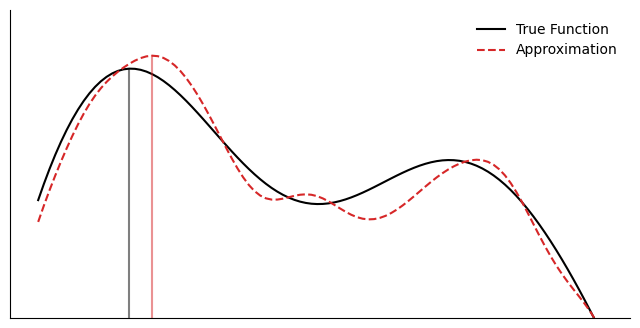

In [215]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# Original function
xs = np.linspace(-3, 2, 100)
ys_true = np.sin(xs * 2) + 0.1 * (-(xs ** 4) + (-xs ** 3) + 3 * (xs ** 2) - 7 * (xs))

# Smooth random noise for "approximation"
rng = np.random.default_rng(seed=3)
raw_noise = rng.normal(size=len(xs))
smooth_noise = gaussian_filter1d(raw_noise, sigma=5)  # smooth the noise

ys_approx = ys_true + 2 * smooth_noise

# Plot
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
ax = axes

ax.plot(xs, ys_true, label="True Function", c='k')
ax.plot(xs, ys_approx, label="Approximation", linestyle="--", c='tab:red')
ax.set_ylim(-3, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(frameon=False)
ax.axvline(x=xs[ys_approx.argmax()], ymax=(ys_approx.max() + 3) / 7, alpha=0.5, c='tab:red')
ax.axvline(x=xs[ys_true.argmax()], ymax=(ys_true.max() + 3) / 7, c='k', alpha=0.5)
plt.gcf().set_size_inches(8, 4)
plt.savefig('../../results/figures/schematics/cql_approximation.pdf')
plt.show()

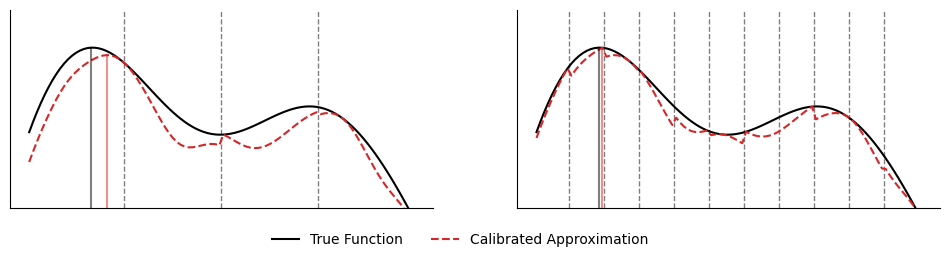

In [ ]:
def plot_calibrated_data(xs, ys_approx, n_bins, ax, show_vlines = True):
    ys_calibrated = ys_approx.copy()
    ix_per_bin = int(len(xs) / n_bins)
    corrections = []
    for ix in range(n_bins):
        sliced_ix = slice(ix*ix_per_bin, (ix+1)*ix_per_bin)
        approx_vals = ys_approx[sliced_ix]
        true_vals = ys_true[sliced_ix]
        correction = (approx_vals - true_vals).max()
        ys_calibrated[sliced_ix] -= correction
        corrections.append(correction)

        
    # Plot
    ax.plot(xs, ys_true, label="True Function", c='k')
    ax.plot(xs, ys_calibrated, label="Calibrated Approximation", linestyle="--", c='tab:red')
    ax.set_ylim(-3, 4)
    for ix in range(n_bins):
        if not show_vlines:
            break
        ix_adj = ix*ix_per_bin
        if ix_adj == 0:
            pass
        else:
            ax.axvline((xs[ix_adj-1] + xs[ix_adj])/2, c='k', zorder=-99, linestyle='--', linewidth=1, alpha=0.5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.legend(frameon=False)
    ax.axvline(x=xs[ys_calibrated.argmax()], ymax=(ys_calibrated.max() + 3) / 7, alpha=0.5, c='tab:red')
    ax.axvline(x=xs[ys_true.argmax()], ymax=(ys_true.max() + 3) / 7, c='k', alpha=0.5)


fig, axes = plt.subplots(1, 2, figsize=(12, 3))

plot_calibrated_data(xs, ys_approx, n_bins=4, ax=axes[0])
plot_calibrated_data(xs, ys_approx, n_bins=11, ax=axes[1], show_vlines=True)

# Create a single legend for the whole figure
# collect handles/labels from axes and deduplicate while preserving order
handles = []
labels = []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    for hi, li in zip(h, l):
        if li not in labels:
            handles.append(hi)
            labels.append(li)

# make room for the legend and place it centered below the plots as one row
fig.subplots_adjust(bottom=0.22)                     # increase bottom margin
fig.legend(handles, labels, ncol=len(labels),        # one row with all labels
           loc='lower center', frameon=False,
           bbox_to_anchor=(0.5, 0.05),              # tweak vertical offset if needed
           bbox_transform=fig.transFigure)

plt.savefig('../../results/figures/schematics/cql_approximation_calibrated.pdf')
plt.show()